In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS/IS.csv')

#displaying the first 5 rows
data.head(5)

,URL,Label
0,ctt.j-orders.online/,Bad
1,romebarbies.com/jp\n,Good
2,rebrand.ly/e\n,Good
3,ctt.j-orders.online/\n,Bad
4,shortlinks.su/s/\n,Bad


In [ ]:
data.shape

(757, 2)

In [ ]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     757 non-null    object
 1   Label   757 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [ ]:
#Displaying a stastical summary of the dataset
data.describe()

,URL,Label
count,757,757
unique,371,2
top,www.galageshome.com/\n,Bad
freq,8,398


In [ ]:
#Counting and checking for null values
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(data.Label.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


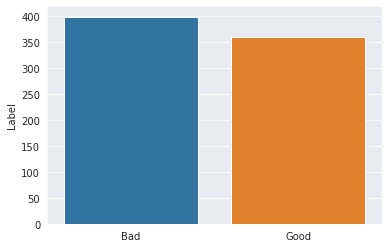

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [ ]:
data.Label.value_counts()

Bad     398
Good    359
Name: Label, dtype: int64

In [ ]:
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
tokenizer.tokenize(data.URL[0]) # this will fetch all the words from the first URL

['ctt', 'j', 'orders', 'online']

In [ ]:
# Tokenizing all the rows 
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.004372171000113667 sec


In [ ]:
data.sample(5)

,URL,Label,text_tokenized
243,sb-page.firebaseapp.com/\n,Good,"[sb, page, firebaseapp, com]"
175,caseid.web.app/\n,Good,"[caseid, web, app]"
610,bmozs.com/\n,Bad,"[bmozs, com]"
327,trini.myportfolio.com/\n,Good,"[trini, myportfolio, com]"
97,verivikasipembloki.wixsite.com/peringatan/masu...,Good,"[verivikasipembloki, wixsite, com, peringatan,..."


In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 0.04037946500011458 sec


In [ ]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed
4,shortlinks.su/s/\n,Bad,"[shortlinks, su, s]","[shortlink, su, s]"
52,ukv.app.goo.gl/eRgRTcVEMWHuzZA\n,Bad,"[ukv, app, goo, gl, eRgRTcVEMWHuzZA]","[ukv, app, goo, gl, ergrtcvemwhuzza]"
624,storageapi.fleek.co/dfac--c-e-aeabdda-bucke......,Good,"[storageapi, fleek, co, dfac, c, e, aeabdda, b...","[storageapi, fleek, co, dfac, c, e, aeabdda, b..."
588,binancecash.io/\n,Bad,"[binancecash, io]","[binancecash, io]"
753,puspitasawargi.com/ltaupy/\n,Bad,"[puspitasawargi, com, ltaupy]","[puspitasawargi, com, ltaupi]"


In [ ]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.00267243299981601 sec


In [ ]:
bad_sites = data[data.Label == 'Bad']
good_sites = data[data.Label == 'Good']

In [ ]:
data.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,ctt.j-orders.online/,Bad,"[ctt, j, orders, online]","[ctt, j, order, onlin]",ctt j order onlin
1,romebarbies.com/jp\n,Good,"[romebarbies, com, jp]","[romebarbi, com, jp]",romebarbi com jp
2,rebrand.ly/e\n,Good,"[rebrand, ly, e]","[rebrand, ly, e]",rebrand ly e
3,ctt.j-orders.online/\n,Bad,"[ctt, j, orders, online]","[ctt, j, order, onlin]",ctt j order onlin
4,shortlinks.su/s/\n,Bad,"[shortlinks, su, s]","[shortlink, su, s]",shortlink su s


In [ ]:
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
#feature[:5].toarray() # convert sparse matrix into array to print transformed features

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, data.Label)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(trainX,trainY)

0.9770723104056437

In [ ]:
lr.score(testX,testY)

0.9368421052631579

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9770723104056437
Testing Accuracy : 0.9368421052631579

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.92      0.94       108
        Good       0.90      0.96      0.93        82

    accuracy                           0.94       190
   macro avg       0.93      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190


CONFUSION MATRIX


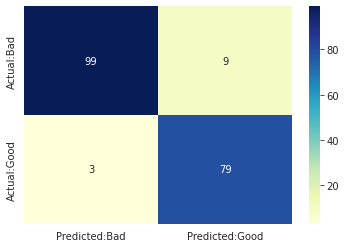

In [ ]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")